In [1]:
from bin import cryptoClass

In [2]:
from bin.processor import processor
import pandas as pd
import numpy as np
import seaborn as sns
data=processor(base='data/cryptoData',path='raw_data/')
data=data.data
data=data.head(1000)

Shape of combined df:  (237850, 5)
After removing duplicate prices:  (231250, 5)
After removing duplicate datetimes:  (231209, 5)


In [3]:
data.describe()

,BTC,ETH,LTC
count,1000.000000,1000.000000,1000.000000
mean,3984.874860,135.461440,59.567990
std,8.252558,0.748736,0.378652
min,3960.980000,133.310000,58.550000
25%,3978.700000,135.150000,59.350000
50%,3986.500000,135.735000,59.560000
75%,3992.320000,136.160000,59.860000
max,3996.470000,136.440000,60.250000


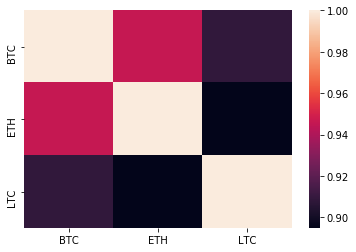

In [4]:
sns.heatmap(data.corr())

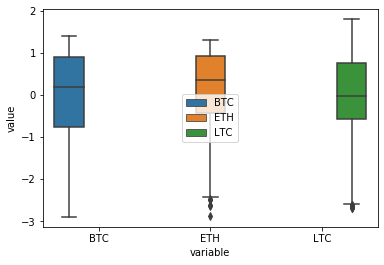

In [5]:
def standardize(price,column):
    #output the standardized value of price wrt column
    standardized_price=price-np.mean(column)
    standardized_price=standardized_price/np.std(column)
    return(standardized_price)

std_BTC=data['BTC'].apply(lambda price: standardize(price,data['BTC']))

std_ETH=data['ETH'].apply(lambda price: standardize(price,data['ETH']))

std_LTC=data['LTC'].apply(lambda price: standardize(price,data['LTC']))

import matplotlib.pyplot as plt
std_prices=pd.concat([std_BTC,std_ETH,std_LTC],axis=1)
prices=pd.melt(std_prices)
sns.boxplot(y='value',x='variable',hue='variable', data=prices)
plt.legend(loc='best')

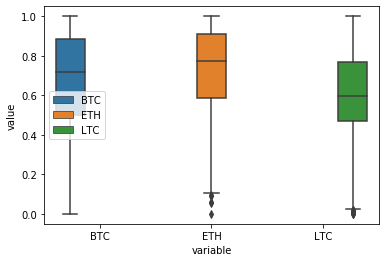

In [6]:
def normalize(price,column):
    #output the normalized value of price wrt column
    normalized_price=price-np.min(column)
    col_range=np.max(column)-np.min(column)
    normalized_price=normalized_price/col_range
    return(normalized_price)

std_BTC=data['BTC'].apply(lambda price: normalize(price,data['BTC']))

std_ETH=data['ETH'].apply(lambda price: normalize(price,data['ETH']))

std_LTC=data['LTC'].apply(lambda price: normalize(price,data['LTC']))

import matplotlib.pyplot as plt
std_prices=pd.concat([std_BTC,std_ETH,std_LTC],axis=1)
prices=pd.melt(std_prices)
sns.boxplot(y='value',x='variable',hue='variable', data=prices)
plt.legend(loc='best')